# Exercise 5.17
Let $c\in\mathbb{R}$ be any constant and consider the softmax function. 
Assume that $(t_1, \ldots, t_k)\in\mathbb{R}^k$ then 
\begin{align*}
    \mathscr{S}(c+t_1, \ldots, c+t_k) &= \left(\frac{e^{c +t_1}}{\sum_{j=1}^k e^{c + t_j}}, \ldots, \frac{e^{c +t_1}}{\sum_{j=1}^k e^{c + t_j}}\right) =  \left(\frac{e^{c}e^{t_1}}{\sum_{j=1}^k e^c  e^{t_j}}, \ldots, \frac{e^c e^{t_k}}{\sum_{j=1}^k e^{c}e^{t_j}}\right)\\
    &=\left(\frac{e^{t_1}}{\sum_{j=1}^k  e^{t_j}}, \ldots, \frac{ e^{t_k}}{\sum_{j=1}^k e^{t_j}}\right) = \mathscr{S}(t_1, \ldots, t_k).
\end{align*}
If $t_i = X^T \boldsymbol{\beta}_i$ and $c = X^T \boldsymbol{\beta}_k$ then by the work up above we know that $\mathscr{S}(t_1 - C, \ldots, t_k - c) = \mathscr{S}(t_1, \ldots, t_k)$ as desired. 

# Exercise 5.18
By exercise 5.17 we can assume that $\boldsymbol{\beta}_2 = \boldsymbol{0}$ which gives 
\begin{align*}
    &-\sum_{i=1}^n \sum_{m=1}^2 \mathbb{1}_j(y_i) \log\left(\frac{\exp(\boldsymbol{x}_i^T\boldsymbol{\beta}_j)}{\sum_{m=1}^2 \exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_m)}\right) \\
    &=-\sum_{i=1}^n\left[\mathbb{1}_1(y_i) \log\left(\frac{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1)}{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + \exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_2)}\right) +\mathbb{1}_2(y_i) \log\left(\frac{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_2)}{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + \exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_2)}\right)\right]
\end{align*}
Notice that the second $\log$ in the sum will give $0$ since $\boldsymbol{\beta}_2 =\boldsymbol{0}$. 
\begin{align*}
    &=-\sum_{i=1}^n\left[\mathbb{1}_1(y_i) \log\left(\frac{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1)}{\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + \exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_2)}\right) \right]\\ 
    &=-\sum_{i=1}^n\mathbb{1}_1(y_i) \left[\log(\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1)) + \log(\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + \exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_2)) \right]\\
    &= -\sum_{i=1}^n\mathbb{1}_1(y_i) \left[\log(\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1)) + \log(\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + 1) \right]\\
    &= \sum_{i=1}^n \left[y_i\log(1 +\exp(-\boldsymbol{x}_i^T \boldsymbol{\beta}_1)) + (1 -y_i)\log(\exp(\boldsymbol{x}_i^T \boldsymbol{\beta}_1) + 1 \right]
\end{align*}
as desired. 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Exercise 5.19

In [ ]:
def prob5_19():
    #load dataset
    digits = datasets.load_digits()
    images = digits.images
    labels = digits.target 
    #get the train and test split
    X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.3)

    X_train_flat = [dig.flatten() for dig in X_train]
    X_test_flat = [dig.flatten() for dig in X_test]

    c_vals = np.linspace(0.01, 1, 50) 
    max_score = 0
    best_cval = 0
    for c in c_vals:
        LRC = LogisticRegression(penalty = 'l2',solver = 'newton-cg', C = c, multi_class='multinomial')
        LRC.fit(X_train_flat, y_train)
        curr_score = LRC.score(X_test_flat, y_test)
        if curr_score > max_score:
            max_score = curr_score
            best_cval = c


    return best_cval, max_score

best_cval, max_score = prob5_19()
print('Softmax:')
print('Best C Value', best_cval)
print('Best Score:', max_score)

Softmax:
Best C Value 0.01
Best Score: 0.9570747217806042


# Exercise 5.20

In [ ]:
def prob5_20():
    #load dataset
    digits = datasets.load_digits()
    images = digits.images
    labels = digits.target 
    #get the train and test split
    X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.3)

    X_train_flat = [dig.flatten() for dig in X_train]
    X_test_flat = [dig.flatten() for dig in X_test]

    c_vals = np.linspace(0.01, 1, 50) 
    max_score = 0
    best_cval = 0
    for c in c_vals:
        LRC = LogisticRegression(penalty = 'l2',solver = 'newton-cg', C = c, multi_class='ovr')
        LRC.fit(X_train_flat, y_train)
        curr_score = LRC.score(X_test_flat, y_test)
        if curr_score > max_score:
            max_score = curr_score
            best_cval = c


    return best_cval, max_score

best_cval, max_score = prob5_20()

print('One-Versus-Rest')
print('Best C Value', best_cval)
print('Best Score:', max_score)

One-Versus-Rest
Best C Value 0.09081632653061224
Best Score: 0.9554848966613673


Epoch 1/12
353/353 [==============================] - 1s 3ms/step - loss: 1.2737 - accuracy: 0.6117 - val_loss: 0.9426 - val_accuracy: 0.6979
Epoch 2/12
353/353 [==============================] - 1s 2ms/step - loss: 0.8456 - accuracy: 0.7346 - val_loss: 0.7967 - val_accuracy: 0.7420
Epoch 3/12
353/353 [==============================] - 1s 3ms/step - loss: 0.7470 - accuracy: 0.7656 - val_loss: 0.7322 - val_accuracy: 0.7622
Epoch 4/12
353/353 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.7823 - val_loss: 0.6914 - val_accuracy: 0.7725
Epoch 5/12
353/353 [==============================] - 1s 3ms/step - loss: 0.6597 - accuracy: 0.7922 - val_loss: 0.6640 - val_accuracy: 0.7832
Epoch 6/12
353/353 [==============================] - 1s 2ms/step - loss: 0.6349 - accuracy: 0.7998 - val_loss: 0.6428 - val_accuracy: 0.7901
Epoch 7/12
353/353 [==============================] - 1s 2ms/step - loss: 0.6156 - accuracy: 0.8048 - val_loss: 0.6274 - val_accuracy: 0.7953
Epoch 

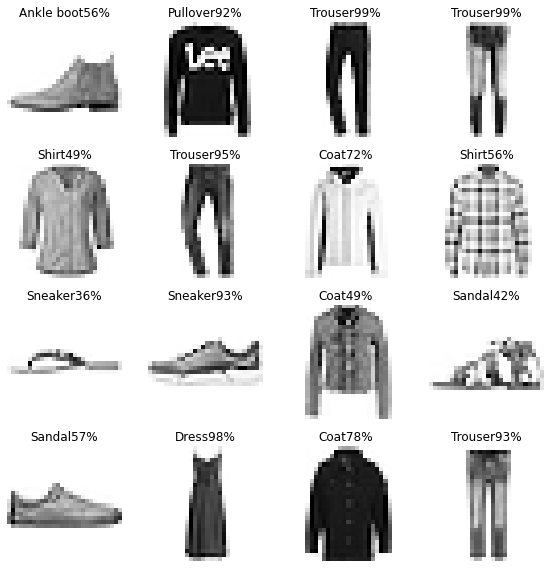

In [ ]:
def prob5_21():
    (X_train, y_train), (X_test, y_test) =  fashion_mnist.load_data()
    input_dim = 784 #28*28
    X_train = X_train.reshape(60000, input_dim)
    X_test = X_test.reshape(10000, input_dim) 
    X_train = X_train/255
    X_test = X_test/255
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    output_dim = 10 # number of classes
    soft = Sequential() # Set up
    soft.add(Dense(output_dim, input_dim=input_dim,
    activation='softmax',
    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
    soft.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    soft.fit(X_train, 
             Y_train, 
             batch_size=170,
             epochs=12, 
             verbose = 1, 
             validation_data=(X_test, Y_test))  
    n = 16  # number of predictions to show
    X_new = X_test[:n]
    probs=soft.predict(X_new) #predicted probabilities
    class_names = ['T-shirt/top','Trouser','Pullover',
                   'Dress','Coat','Sandal','Shirt',
                   'Sneaker','Bag','Ankle boot']
    # Plot
    cols = 4
    rows = (len(X_new)+cols-1)//cols
    plt.figure(figsize=(cols*2,rows*2))
    X_new = X_new.reshape(n,28,28) #unflatten into images
    for i,x in enumerate(X_new):
        ax = plt.subplot(rows,cols,i+1)
        ax.imshow(x, cmap='Greys')
        best_guess = np.argmax(probs[i])
        best_prob = int(probs[i][best_guess] * 100)
        ax.set_title(class_names[best_guess]+f'{best_prob}%')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    return

prob5_21()
             

The best hyperparameters I found were with batchsize=170 and epochs = 12.

In [ ]:
#upload data
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


# Exercise 5.22
We loaded in health data and we will make a multiclass classification problem that will try to determine someones work type based on their BMI, stroke, and hypertension. 
Note that there are several options for working type. Namely: Private, Self-emplyed, Govt_job, children, and Never_worked. These will be mapped to 0-4 respetively.  

In [ ]:
def prob5_23():
    #get dataframe and corresponding values
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')
    df = df[df['bmi'].notna()]
    unique_work_types = pd.unique(df['work_type'])

    #drop rows with na values

    work_type = df['work_type'].values
    BMI = df['bmi'].values
    hypertensive = df['hypertension'].values
    stroke = df['stroke'].values

    for i, wt in enumerate(unique_work_types):
        #get the mask for the work type
        mask = work_type == wt 
        #get the corresponding bmi, hypertension, and stroke
        corresponding_bmi = BMI[mask].reshape(-1, 1)
        corresponding_hyper = hypertensive[mask].reshape(-1, 1)
        corresponding_stroke =  stroke[mask].reshape(-1, 1)
        #make the labels
        labels = i*np.ones(corresponding_bmi.size)

        current_identifiers = np.hstack((corresponding_bmi, 
                                        corresponding_hyper, 
                                        corresponding_stroke))
        if i == 0:
            all_labels = labels
            all_identifiers = current_identifiers
        else:
            all_identifiers = np.vstack((all_identifiers, 
                                         current_identifiers))
            all_labels = np.concatenate((all_labels,labels))

    #now we can make our classifier
    X_train, X_test, y_train, y_test = train_test_split(all_identifiers, all_labels, train_size=0.3)
    #c_values we will test
    c_vals = np.linspace(0.01, 1, 25) 
    #test all solvers
    solver_types = ['newton-cg', 'lbfgs', 'sag', 'saga']
    #test all penalty parameters
    available_penalties = [ ['l2'], ['l2'], ['l2'], ['elasticnet', 'l1', 'l2'] ]
    l1_ratios = np.linspace(0.1, 0.99, 10)
    max_score = 0
    best_cval = 0
    best_solver = None
    best_penalty = None
    best_ratio = None
    #iterate through and find best sover, penalty type, and corresponding c_value.  
    for i, solver in enumerate(solver_types):
        for penalty in available_penalties[i]:
            for c in c_vals:
                for ratio in l1_ratios:
                    LRC = LogisticRegression(penalty = penalty, solver = solver, C=c, multi_class='multinomial', l1_ratio = ratio, n_jobs = -1)
                    #train
                    LRC.fit(X_train, y_train)
                    #score
                    curr_score = LRC.score(X_test, y_test)
                    #update the best parameters
                    if curr_score > max_score:
                        max_score = curr_score
                        best_cval = c
                        best_solver = solver
                        best_penalty = penalty
                        best_ratio = ratio


    return max_score, best_cval, best_solver, best_penalty, best_ratio

max_score, best_cval, best_solver, best_penalty, best_ratio = prob5_23()

In [ ]:
print('Best Regularization and Hyper Parameters:')
print('Best Score:', max_score)
print('Best Regularization Parameters:', best_cval)
print('Best Solver:', best_solver)
print('Best Penalty:', best_penalty)
if best_penalty == 'elasticnet':
    print('Best Ratio:', best_ratio)

Best Regularization and Hyper Parameters:
Best Score: 0.6406750072737852
Best Regularization Parameters: 0.0925
Best Solver: lbfgs
Best Penalty: l2


For the mutliclass regression problem that we are trying to solve (predict job types by stroke, hypertension, and BMI) we chose our our regularization model by looping through all possible combinations and getting the combination that gave the best score. Similar to problems 19 and 20 we did a 30-70 train-test-split. The best parameters we found are listed below:

Best Regularization and Hyper Parameters:

Best Score: 0.6406750072737852

Best Regularization Parameters: 0.0925

Best Solver: lbfgs

Best Penalty: l2

The goal of this problem was to see if we could identify the work type of people from their medical state. Unfortunately, at least for this type of classification, it seems that it isn't possible. We are getting 64% accuracy which is nowhere near where you want a classification model to be. Unless we get more data points it seems that we can't classify (very well) work types based on medical history. 